In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
from sklearn.model_selection import GridSearchCV

In [26]:
import numpy as np
import pandas as pd

data = pd.read_csv(r"C:\Users\parik\Downloads\Fast Food Sales.csv")

# Assuming 'item_type' is the target column and 'item_price', 'quantity' are feature columns
class1_data = data[data['item_type'] == 'Fastfood']  
class2_data = data[data['item_type'] == 'Beverages'] 

# Calculate class centroids
centroid1 = class1_data[['item_price', 'quantity']].mean(axis=0)
centroid2 = class2_data[['item_price', 'quantity']].mean(axis=0)

# Calculate spread (standard deviation)
spread1 = class1_data[['item_price', 'quantity']].std(axis=0)
spread2 = class2_data[['item_price', 'quantity']].std(axis=0)

# Calculate distance between centroids
interclass_distance = np.linalg.norm(centroid1 - centroid2)

print("Class 1 centroid:\n", centroid1)
print("Class 2 centroid:\n", centroid2)
print("Spread of class 1:\n", spread1)
print("Spread of class 2:\n", spread2)
print("Interclass distance:", interclass_distance)


Class 1 centroid:
 item_price    33.600583
quantity       8.051020
dtype: float64
Class 2 centroid:
 item_price    32.691083
quantity       8.404459
dtype: float64
Spread of class 1:
 item_price    17.282815
quantity       4.428708
dtype: float64
Spread of class 2:
 item_price    7.509533
quantity      4.375956
dtype: float64
Interclass distance: 0.9757608969995947


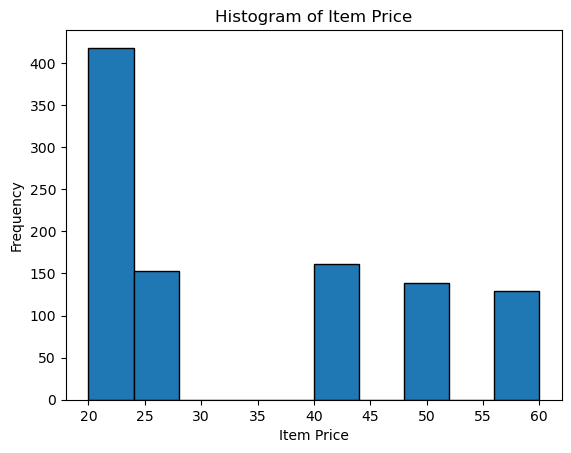

Mean of Item Price: 33.315
Variance of Item Price: 222.65843343343138


In [27]:
import matplotlib.pyplot as plt

feature_data = data['item_price']

# Plot histogram
plt.hist(feature_data, bins=10, edgecolor='black')
plt.xlabel('Item Price')
plt.ylabel('Frequency')
plt.title('Histogram of Item Price')
plt.show()

# Calculate mean and variance
mean = feature_data.mean()
variance = feature_data.var()

print("Mean of Item Price:", mean)
print("Variance of Item Price:", variance)


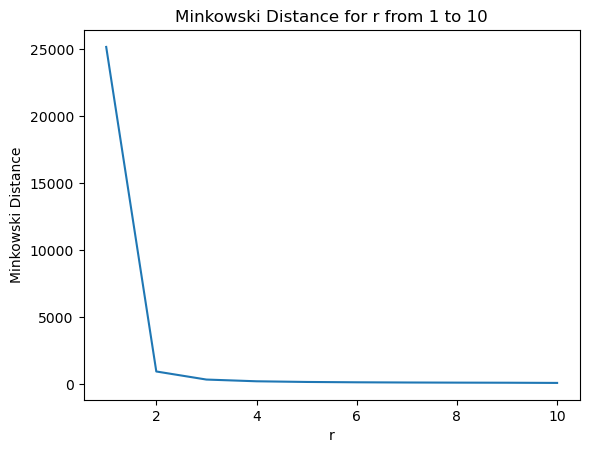

In [28]:
# Assume 'item_price' and 'quantity' are the features we are interested in
feature1 = data['item_price']
feature2 = data['quantity']

minkowski_distances = []

for r in range(1, 11):
    distance = np.sum(np.abs(feature1 - feature2)**r)**(1/r)
    minkowski_distances.append(distance)

plt.plot(range(1, 11), minkowski_distances)
plt.xlabel('r')
plt.ylabel('Minkowski Distance')
plt.title('Minkowski Distance for r from 1 to 10')
plt.show()


In [29]:
pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.


In [30]:
from sklearn.model_selection import train_test_split

# Assume 'item_type' is the target column and 'item_price', 'quantity' are feature columns
X = data[['item_price', 'quantity']]
y = data['item_type']

# Encode the target labels if they are not numeric
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [31]:
from sklearn.neighbors import KNeighborsClassifier

# Train kNN classifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


KNeighborsClassifier(n_neighbors=3)

In [32]:
# Test accuracy
accuracy = knn.score(X_test, y_test)
print("Accuracy:", accuracy)


Accuracy: 1.0


Confusion Matrix:
 [[ 88   0]
 [  0 212]]
Precision: 1.0
Recall: 1.0
F1-Score: 1.0


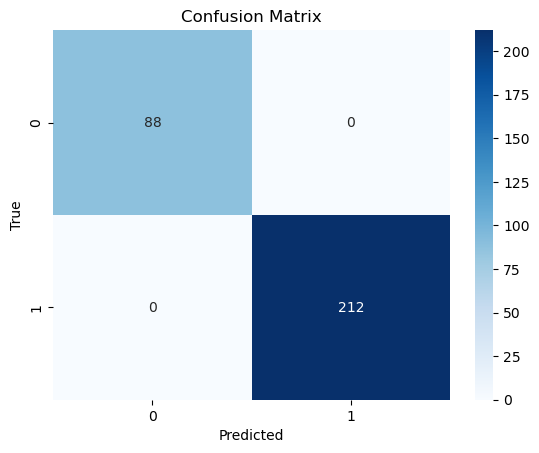

In [33]:
# Predict and evaluate
y_pred = knn.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted')

print("Confusion Matrix:\n", conf_matrix)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()
